In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lentaru/sample_submission.csv
/kaggle/input/lentaru/lenta-ru-test.csv
/kaggle/input/lentaru/lenta-ru-train.csv
/kaggle/input/lenta-ru-ozon-2020/sample_submission.csv
/kaggle/input/lenta-ru-ozon-2020/lenta-ru-test.csv
/kaggle/input/lenta-ru-ozon-2020/lenta-ru-train.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv('/kaggle/input/lenta-ru-ozon-2020/lenta-ru-train.csv')
data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)
print(data_train.shape)
data_train.head()

(165309, 4)


,title,text,topic,topic_label
95723,Частный космический корабль стартовал к МКС,Ракета-носитель Falcon 9 с космическим корабле...,Наука и техника,2
39905,Росавиация нашла в авиакомпании Лебедева неисп...,Руководство авиакомпании Red Wings Александра ...,Экономика,0
143154,ОПЕК отложила снижение квот на добычу нефти до...,Организация стран – экспортеров нефти (ОПЕК) п...,Экономика,0
124047,Нагасаки отметил 60-летие атомной бомбардировки,В японском городе Нагасаки прошли траурные мер...,Наука и техника,2
120476,Том Джонс посвятил песню жене впервые за 50 ле...,Британский эстрадный певец Том Джонс посвятил ...,Культура,3


<function matplotlib.pyplot.show(close=None, block=None)>

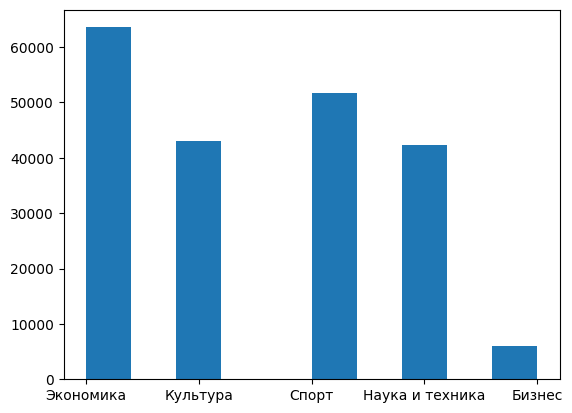

In [10]:
plt.hist(data['topic'])
plt.show

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
stop = set(stopwords.words('russian'))
def preprocessing(text):
    text = str(text)
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop]
    tokens = ' '.join(tokens)
    return tokens;

In [13]:
x_train = data_train['text'].apply(preprocessing)
x_val = data_val['text'].apply(preprocessing)

In [14]:
x_train.head(5)

95723     ракетаноситель falcon 9 космическим кораблем d...
39905     руководство авиакомпании red wings александра ...
143154    организация стран – экспортеров нефти опек при...
124047    японском городе нагасаки прошли траурные мероп...
120476    британский эстрадный певец джонс посвятил песн...
Name: text, dtype: object

In [15]:
y_train = data_train['topic_label'].values
y_val = data_val['topic_label'].values

# Word2Vec lets go go go

In [16]:
from gensim.models import word2vec

In [17]:
print(type(x_train))
print(x_train.head(5))
x = x_train.copy()
print(x.values[:5])

<class 'pandas.core.series.Series'>
95723     ракетаноситель falcon 9 космическим кораблем d...
39905     руководство авиакомпании red wings александра ...
143154    организация стран – экспортеров нефти опек при...
124047    японском городе нагасаки прошли траурные мероп...
120476    британский эстрадный певец джонс посвятил песн...
Name: text, dtype: object
['ракетаноситель falcon 9 космическим кораблем dragon разработанным компанией spacex отправилась международной космической станции сообщается официальном сайте nasa запуск грузовика осуществленный космодрома мысе канаверал флориде 8 октября 0435 московскому времени стал первым коммерческим стартом частного корабля мкс истории соответствии графиком dragon должен достигнуть мкс 10 октября стыковку аппарата станцией проведут находящиеся астронавт nasa санита уильямс японский космонавт акихико хосиде грузовик доставит мкс примерно 450 килограммов полезного груза числе материалы проведения 166 научных экспериментов конце октября dragon

In [18]:
sen_train = [text.split() for text in x_train.values]
sen_val = [text.split() for text in x_val.values]

In [19]:
print(sen_train[:5])

[['ракетаноситель', 'falcon', '9', 'космическим', 'кораблем', 'dragon', 'разработанным', 'компанией', 'spacex', 'отправилась', 'международной', 'космической', 'станции', 'сообщается', 'официальном', 'сайте', 'nasa', 'запуск', 'грузовика', 'осуществленный', 'космодрома', 'мысе', 'канаверал', 'флориде', '8', 'октября', '0435', 'московскому', 'времени', 'стал', 'первым', 'коммерческим', 'стартом', 'частного', 'корабля', 'мкс', 'истории', 'соответствии', 'графиком', 'dragon', 'должен', 'достигнуть', 'мкс', '10', 'октября', 'стыковку', 'аппарата', 'станцией', 'проведут', 'находящиеся', 'астронавт', 'nasa', 'санита', 'уильямс', 'японский', 'космонавт', 'акихико', 'хосиде', 'грузовик', 'доставит', 'мкс', 'примерно', '450', 'килограммов', 'полезного', 'груза', 'числе', 'материалы', 'проведения', '166', 'научных', 'экспериментов', 'конце', 'октября', 'dragon', 'отстыкуется', 'станции', 'вернется', 'землю', 'приводнится', 'акватории', 'тихого', 'океана', 'грузовик', 'привезет', 'мкс', 'материалы

In [20]:
%%time
vector_size = 200
w2v_model = word2vec.Word2Vec(sentences=sen_train, workers=4, vector_size=vector_size, min_count=3, window=5)

CPU times: user 10min 46s, sys: 3.09 s, total: 10min 49s
Wall time: 3min


In [21]:
w2v_model.wv.get_vector("говно")

array([ 0.10863523, -0.12185112,  0.10413292,  0.08067863, -0.05390157,
       -0.06349964,  0.09710121,  0.27480066, -0.09133823,  0.07574943,
       -0.01418684, -0.12289845,  0.104174  ,  0.098207  , -0.05409573,
       -0.11593156, -0.00930291,  0.14293894, -0.05641106, -0.24523781,
        0.06842756, -0.05402443, -0.04224887, -0.06012407, -0.09887143,
       -0.02632098,  0.02676934,  0.06276662, -0.1343459 ,  0.02872377,
        0.18262172,  0.00183938,  0.18639934, -0.0582792 , -0.03341758,
        0.1269727 ,  0.06940512,  0.16357079,  0.01391176, -0.10430121,
       -0.11335277,  0.039004  , -0.03662533, -0.0365886 ,  0.15058972,
       -0.03385922, -0.08448029, -0.08476406,  0.0635989 ,  0.08634154,
        0.10588662, -0.19161382, -0.08516584, -0.23762073,  0.10751006,
       -0.09983713, -0.06159507, -0.14225207, -0.08770344, -0.05377554,
       -0.04377894,  0.11154849,  0.0945804 , -0.08005959, -0.2939827 ,
        0.15754534, -0.03168274,  0.23990951, -0.1087585 ,  0.04

In [22]:
w2v_model.wv.most_similar(positive=['говно'])

[('паркуюсь', 0.840501070022583),
 ('миллеры', 0.8388309478759766),
 ('иванушкадурачок', 0.829551637172699),
 ('улыбайся', 0.8190138339996338),
 ('ultraviolence', 0.8120779991149902),
 ('mistress', 0.8116220235824585),
 ('сбербанклизинг', 0.8110370635986328),
 ('отечеству', 0.8107087016105652),
 ('бессонница', 0.8100665807723999),
 ('anacondaz', 0.8100425601005554)]

In [23]:
w2v_model.wv.similarity('спорт', 'кино')

np.float32(0.11686581)

In [24]:
w2v_model.wv.similarity('теннис', 'футбол')

np.float32(0.6851354)

In [25]:
w2v_model.wv.doesnt_match(['инфляция', 'ввп', 'гол'])

'гол'

In [26]:
def vectorize(sentences):
    X = []
    for sentence in sentences:
        sentence_vector = []
        for word in sentence:
            try:
                vector = w2v_model.wv.get_vector(word)
                sentence_vector.append(vector)
            except KeyError:
                # если слово не встретилось при обучениии модели word2vec
                pass
        if len(sentence_vector) > 0:
            sentence_vector = np.array(sentence_vector).mean(axis=0)
        else:
            # вернем нулевой вектор для новости, у которой ни одно слово не встречалось в обучении
            sentence_vector = np.zeros(vector_size)
        X.append(sentence_vector)
    return np.array(X)

In [27]:
x_model_train = vectorize(sen_train)
x_model_val = vectorize(sen_val)

In [28]:
x_model_train[:5, :10]

array([[ 0.3130742 , -0.03281337,  0.65900177,  0.00883662,  0.51791829,
         0.11977839,  0.18199113,  0.12252057,  0.28877023, -0.28698719],
       [ 0.11359768, -0.23049909,  0.49937499, -0.10758078, -0.01568114,
        -0.08673286,  0.00710397,  0.200205  ,  0.26110497, -0.5664289 ],
       [-0.04673742,  0.5697577 ,  1.64066935, -0.03369374,  0.3428168 ,
        -0.23391367, -0.096478  ,  0.3042497 ,  0.36547282, -0.80514371],
       [ 0.11977066, -0.16523533,  0.51393282,  0.16604558,  0.52595341,
        -0.52612233, -0.14207259,  0.30427676, -0.16025941, -0.39772069],
       [ 0.16064513, -0.28176084,  0.29939103,  0.30385938,  0.13684164,
        -0.34948862,  0.25719163,  0.05560227, -0.45205387, -0.57019651]])

In [29]:
from sklearn.manifold import TSNE
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(x_model_train)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


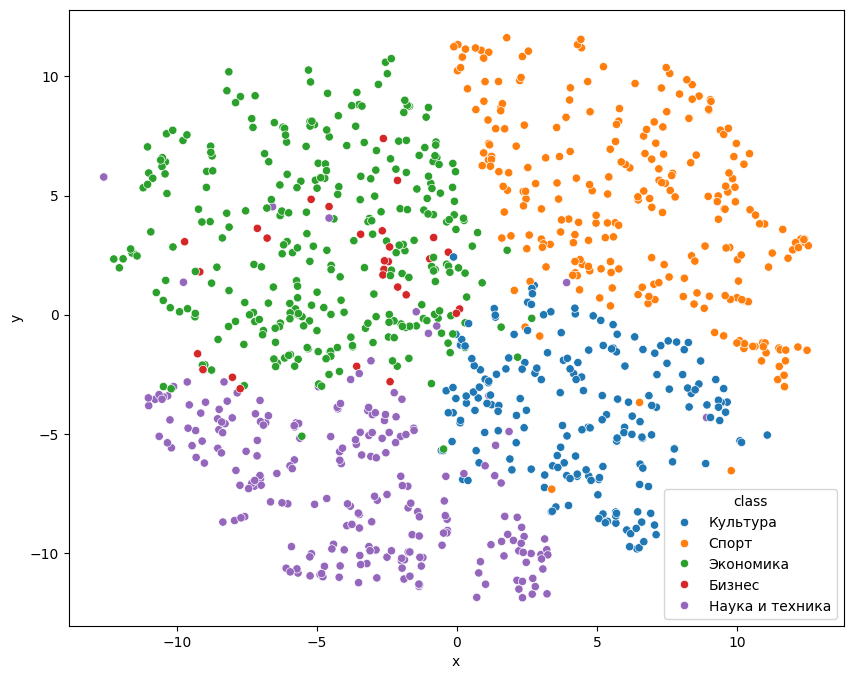

In [30]:
data_viz = {
    'x': tsne_results[:,0],
    'y': tsne_results[:,1],
    'class': data_train['topic'].values,
}

df_viz = pd.DataFrame(data_viz)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_viz.sample(1000), x='x', y='y', hue='class')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
print(x_model_val.shape)
print(y_val.shape)

(41328, 200)
(41328,)


In [33]:
model = LogisticRegression(max_iter=5000)
model.fit(x_model_train, y_train)

y_pred = model.predict(x_model_val)
score = accuracy_score(y_val, y_pred)

print('Доля правильных ответов Word2Vec + лог. регрессии ', round(score, 3))

Доля правильных ответов Word2Vec + лог. регрессии  0.952


# testing and doing submit attempt

In [34]:
data_test = pd.read_csv('/kaggle/input/lenta-ru-ozon-2020/lenta-ru-test.csv')

In [35]:
data_test.head(5)

,title,text
0,Сборная России выиграла чемпионат мира по футб...,В южноафриканском Кейптауне победой сборной Ро...
1,Анна Курникова снова проиграла в первом раунде,"Анна Курникова, проиграв испанке Кончите Марти..."
2,"Новым главным тренером ""Спартака"" стал Станисл...",Новым главным тренером московского футбольного...
3,Майкл Дуглас совершил неожиданный визит на Кубу,Известный голливудский актер Майкл Дуглас сове...
4,Кадыров снялся в короткометражке «Волшебный гр...,Глава Чеченской Республики Рамзан Кадыров снял...


In [36]:
data_test.shape

(51660, 2)

In [37]:
x_test = data_test['text']
print(x_test.head())

0    В южноафриканском Кейптауне победой сборной Ро...
1    Анна Курникова, проиграв испанке Кончите Марти...
2    Новым главным тренером московского футбольного...
3    Известный голливудский актер Майкл Дуглас сове...
4    Глава Чеченской Республики Рамзан Кадыров снял...
Name: text, dtype: object


In [38]:
x_test = data_test['text'].apply(preprocessing)
print(x_test.head(5))

0    южноафриканском кейптауне победой сборной росс...
1    анна курникова проиграв испанке кончите мартин...
2    новым главным тренером московского футбольного...
3    известный голливудский актер майкл дуглас сове...
4    глава чеченской республики рамзан кадыров снял...
Name: text, dtype: object


In [39]:
sen_test = [text.split() for text in x_test.values]
print(sen_test[:3])

[['южноафриканском', 'кейптауне', 'победой', 'сборной', 'россии', 'завершился', 'чемпионат', 'мира', 'среди', 'бездомных', 'финальном', 'матче', 'российские', 'футболисты', 'впервые', 'своей', 'истории', 'ставшие', 'чемпионами', 'мира', 'обыграли', 'команду', 'казахстана', 'счетом', '10', 'передает', 'bbc', 'news', 'первенстве', 'принимали', 'участие', '500', 'человек', 'которые', 'представляли', '48', 'стран', 'мира', 'матчи', 'каждый', 'которых', 'продолжался', '15', 'минут', 'проходили', 'асфальтовых', 'полях', 'причем', 'одной', 'команде', 'могли', 'играть', 'мужчины', 'женщины', 'сборная', 'россии', 'провела', 'турнире', '13', 'матчей', 'которых', 'добилась', 'победы', 'предыдущих', 'чемпионатах', 'мира', 'достижения', 'российской', 'команды', 'скромнее', '2003м', 'году', '–', '13е', 'место', '2004м', 'году', '–', '5е', 'место', '2005м', 'году', '–', '12е', 'место'], ['анна', 'курникова', 'проиграв', 'испанке', 'кончите', 'мартинес', 'conchita', 'martinez', '67', '16', 'первом', '

In [40]:
x_model_test = vectorize(sen_test)
print(x_model_test[:5, :10])

[[ 0.29263273 -0.0488834   0.80074149  0.03156934  0.46487096 -0.19820774
  -0.5523535  -0.05591577 -0.61951274 -0.21668315]
 [ 0.28280526 -0.19354649  0.44618842  0.04504304  0.38998377 -0.12325983
  -0.07783549 -0.09183121 -0.75184917 -0.45785198]
 [ 0.36396688  0.2007304   0.95779175  0.37778771 -0.41703203 -0.17641351
  -0.45917082 -0.27748033 -0.62713248 -0.06577882]
 [ 0.00558876 -0.139953    0.30153432  0.17592935  0.08271589 -0.01885032
  -0.13015717  0.30706626 -0.04385308 -0.22074732]
 [ 0.23065531 -0.16377145  0.34674889 -0.02135254  0.02363556 -0.50906235
   0.05528886  0.61335295 -0.34063849 -0.34292558]]


In [41]:
y_pred_test = model.predict(x_model_test)
print(y_pred_test[:5])

[1 1 1 3 3]


In [42]:
type(y_pred_test)

numpy.ndarray

In [43]:
df = pd.DataFrame({
    'id': range(len(y_pred_test)),  # Автонумерация 0, 1, 2, ...
    'category': y_pred_test
})
print(df.head(5))

   id  category
0   0         1
1   1         1
2   2         1
3   3         3
4   4         3


In [44]:
df.to_csv('submission.csv', index=False)